# **Introduction**
We are going to run the exact same experiment like **MNIST**, but this time with the **Fashion MNIST** dataset.

The rules are the same:
* **Input**: 28x28 Grayscale Image
* **Output**: One of 10 categories (T-shirt, Trouser, etc.)

#### **Step 1: Load & Prepare Data**
The data comes from `keras.datasets.fashion_mnist`. We also need to define the `class_names` becuase the data only gives us numbers (0-9), and we need to know that "9" means *"Ankle Boot"*.

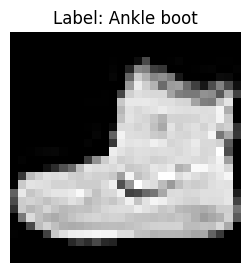

Training Data Shape: (60000, 28, 28)


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


# 1. Load Fashion MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 2. Normalize pixel values (0-255 -> 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Define Label Names (0=T-shirt/top, 1=Trouser, etc.)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 4. Check one image to make sure it loaded correctly
plt.figure(figsize=(3,3))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {class_names[y_train[0]]}")
plt.axis('off')
plt.show()

print(f"Training Data Shape: {x_train.shape}")

#### **Step 2: Build the Brain**
We will use the **exact same architecture** you used for the digits. This proves that the *structure* of the brain is generic, it's the *weights* that learn the specfic task.

In [3]:
model = keras.Sequential([
    # Input Layer (28x28 pixels)
    keras.Input(shape=(28,28)),

    # Flatten layer (2D > 1D)
    keras.layers.Flatten(),

    # Hidden Layer (128 Neurons, ReLU activation)
    keras.layers.Dense(128, activation='relu'),

    # Output Layer (10 Categories, Softmax probality)
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

#### **Step 3: Compile & Train**

Now we teach to distinguis a "Sneaker" from a "Sandal"

In [4]:
# 1. Compile
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 2. Train (5 Epochs)
print("Starting training on Fashion Data...")
history = model.fit(x_train, y_train, epochs=5)

Starting training on Fashion Data...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.8248 - loss: 0.4968
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.8635 - loss: 0.3755
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - accuracy: 0.8776 - loss: 0.3354
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.8868 - loss: 0.3114
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.8917 - loss: 0.2947


**Keep an eye on the accuracy**. For digits, you got ~98%. For clothing, you will likely see it struggle to get past ~88-89%.
* Why? Because a "Shirt" looks a LOT like a "T-shirt" or a "Pullover". The patterns are much harder to separate than clear numbers.

#### **Step 4: Test & Predict**
Let's see if it can identify a random item from the test set that it has never seen before.

313/313 - 0s - 519us/step - accuracy: 0.8694 - loss: 0.3582

Test Accuracy: 0.8694
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


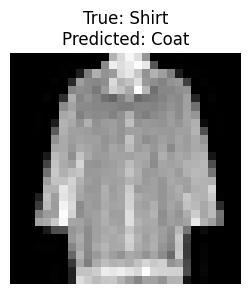

 I am 54.55% sure this is a Coat.


In [5]:
# 1. Evaluate on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 2. Pick a random image to predict
import random
i = random.randint(0, 10000)
img = x_test[i]
true_label_name = class_names[y_test[i]]

# 3. Make Prediction
prediction = model.predict(img.reshape(1, 28, 28))
predicted_index = np.argmax(prediction)
predicted_label_name = class_names[predicted_index]

# 4. Show Result
plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
plt.title(f"True: {true_label_name}\nPredicted: {predicted_label_name}")
plt.axis('off')
plt.show()

# 5. Show Confidence
confidence = prediction[0][predicted_index] * 100
print(f" I am {confidence:.2f}% sure this is a {predicted_label_name}.")

---

#### **Level Up: Convolutional Neural Networks (CNN)**
To break past 87% and hit 92%+, we need a model that respects the shape of the image.

We need a **CNN (Convolutional Neural Network)**.

* Old way (Dense): Look at every single pixel at once (Overwhelming).
* New way (CNN): Scan the image with a small magnifying glass (a "Filter").
    * Filter 1 looks for **Horizontal Lines**.
    * Filter 2 looks for **Vertical Lines**.
    * Filter 3 looks for **Curves**.

#### Step 1: The Code Upgrade.
We are going to add two new layers: `Conv2D` (The Scanner) and `MaxPooling2D` (The Condenser).

In [6]:
# 1. Clear the old model
keras.backend.clear_session()

# 2. Build the CNN
model_cnn = keras.Sequential([
    keras.Input(shape=(28, 28, 1)), # 28x28 images with 1 color channel (grayscale)

    # --- Feature Extraction (The Eye) ---
    # Scan with 32 filters, each 3x3 pixels size
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),

    # Condense the image (Zomm out) to save processing power
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    # Scan again (Deep Learning loves layers!)
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    # --- Classification (The Brain) ---
    # Now we flatten, just like before
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Because `Conv2D` layers are designed to scan "Volumes" (Width x Height x Color Channels), they are picky about the input shape.
* Current Shape: `(28,28)` (Flat sheet of paper).
* CNN Requirement: `(28, 28, 1)` (A book with 1 page).
We need to add that "1" dimension before training.

#### **Step 1: Reshape & Train**

In [8]:
# 1. Reshape data to add the "Channel" dimension
# (69999, 28, 28) becomes (60000, 28, 28, 1)
x_train_cnn = np.expand_dims(x_train, -1)
x_test_cnn = np.expand_dims(x_test, -1)

# 2. Compile the CNN
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 3. Train (This might take slightly longer per epoch!)
print("Starting CNN Training...")
model_cnn.fit(x_train_cnn, y_train, epochs=5)

Starting CNN Training...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8347 - loss: 0.4525
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8887 - loss: 0.3013
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9051 - loss: 0.2567
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9179 - loss: 0.2224
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9251 - loss: 0.1989


#### **Step 2: The Final Test**
Training scores are nice, but **Test Accuracy** is the only thing that matters. Let's see if this smarter brain generalizes better to new clothes.

In [10]:
# Evaluate on the Test Set using the CNN data shape
test_loss, test_acc = model_cnn.evaluate(x_test_cnn, y_test, verbose=2)

print(f"\nPrevious Dense Accuracy: ~0.8700")
print(f"New CNN Accuracy:        {test_acc:.4f}")

313/313 - 0s - 1ms/step - accuracy: 0.9032 - loss: 0.2609

Previous Dense Accuracy: ~0.8700
New CNN Accuracy:        0.9032
